In [41]:
import pandas as pd
data = pd.read_csv('student_data.csv',sep=',')
data.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


1. 시각화 포함 탐색적 자료분석(EDA)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [43]:
data['grade'].value_counts()

9     50
11    40
12    39
10    36
13    34
15    31
8     29
14    28
7     19
6     17
4     15
5     12
16    12
17     9
18     9
2      7
19     4
3      3
1      1
Name: grade, dtype: int64

In [44]:
import matplotlib.pyplot as plt
grade_type = data['grade'].value_counts()

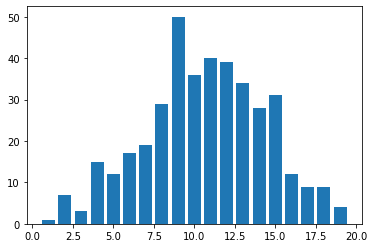

In [45]:
plt.bar(grade_type.index, grade_type.values, bottom=None, align='center')
plt.show()

설명변수인 grade는 1~18사이의 수치형변수로 구성되어 있으며, 
대략적으로 정규분포의 형태를 띄고 있는 것을 확인했다. 

H0 : grade 변수는 정규분포를 따른다. 


H1 : grade 변수는 정규분포를 따르지 않는다. 

In [46]:
from scipy.stats import shapiro
shapiro(data['grade'])

ShapiroResult(statistic=0.9871256351470947, pvalue=0.0014306077500805259)

shapiro test를 통해 종속변수의 정규성 검정 결과 , p-value값이 0.0014로 유의수준 0.05보다 작게 나와 귀무가설을 기각

-> grade 변수는 정규분포를 따르지 않는다. 

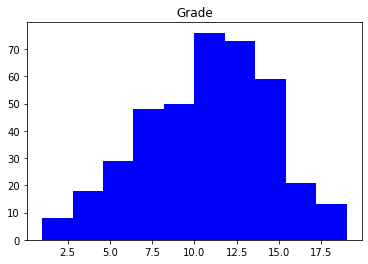

In [47]:
plt.title('Grade')
plt.hist('grade',color='blue',data=data)
plt.show()

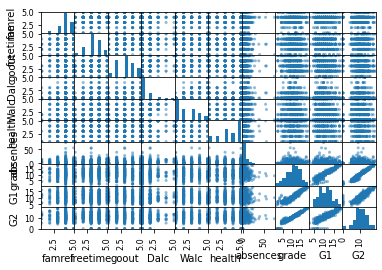

In [48]:
#산점도 행렬
from pandas.plotting import scatter_matrix

scatter_matrix(data,alpha=0.5,diagonal='hist')
plt.show()

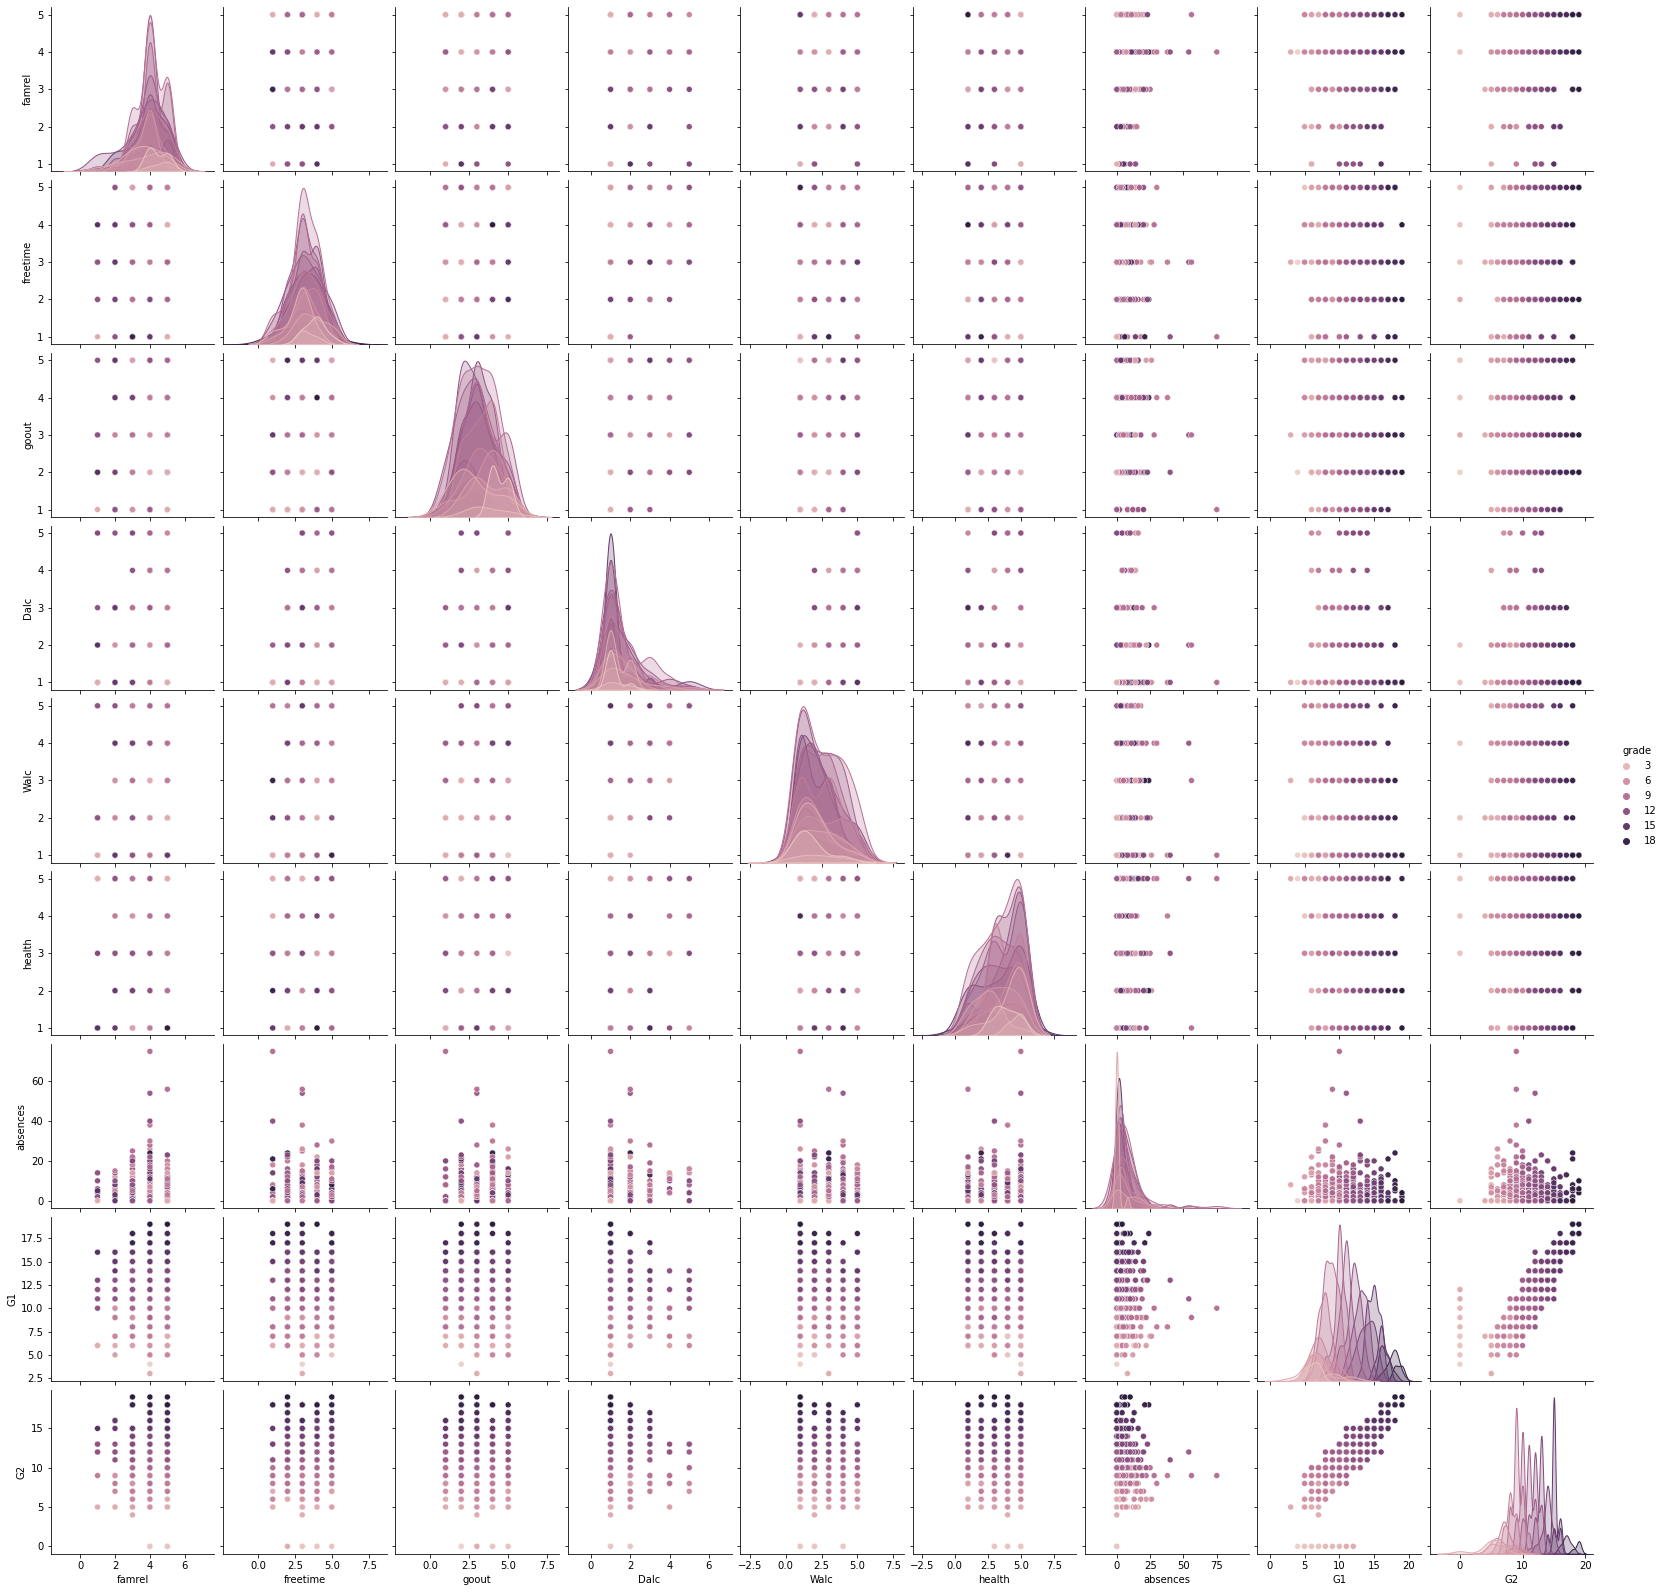

In [49]:
import seaborn as sns
sns.pairplot(data,diag_kind='auto',hue='grade')
plt.show()

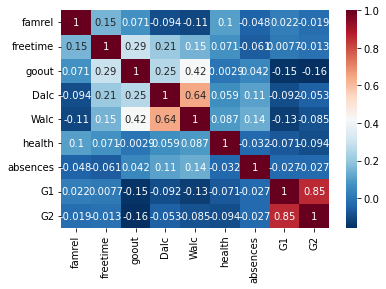

In [50]:
#상관계수 행렬 그래프
data_corr = data.drop(columns='grade').corr(method='pearson')
sns.heatmap(data_corr, xticklabels=data_corr.columns,
            yticklabels=data_corr.columns, 
            cmap='RdBu_r',
            annot=True)

plt.show()

G1과 G2 변수의 상관계수는 0.85로 높게 나타났다. 


두 변수를 제외한 변수들의 상관계수는 상대적으로 낮게 나타나 상관관계가 존재하지 않는다고 판단하였다. 


2. 결측치를 식별/예측하는 두 가지 방법을 쓰고 이를 선택한 이유 설명

In [52]:
#결측치 확인
data.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

famrel, freetime, goout, Dalc, Walc, health, absences 변수에 결측치가 존재하는 것을 확인

결측값 대체 방법

- 단순대치(평균, 중앙값, 최빈값 등) : 결측치를 나머지 열의 평균, 중앙값, 최빈값 등으로 대체
- KNN : 보간법 중 결측치가 없는 컬럼들의 최근접 이웃 알고리즘을 토통해 결측치가 있는 변수 대체(수치형 변수만 사용가능)

한 행이 모두 결측치인 경우는 존재하지 않으므로 삭제보다는 대체

-> 수치형 변수에만 결측치가 존재하므로 KNN 기법 사용

In [53]:
#KNN알고리즘을 사용하여 결측치 대치

from sklearn.impute import KNNImputer

knn_data = data.drop(columns=['school','sex','paid','activities'])

imputer = KNNImputer()
df_filled = imputer.fit_transform(knn_data)
df_filled = pd.DataFrame(df_filled, columns=knn_data.columns)
data[knn_data.columns] = df_filled

data.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

3. 범주형변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 이를 선택한 이유를 설명하시오.

범주형 변수는 주로 문자열 데이터로 수학적인 의미는 가짖 않기 때문에, 수학적 연산을 적용할 수 없다. 따라서 범주형 변수를 더미변수화하여 모델이 이해할 수 있는 형태로 바꿔주어야 한다. 

In [54]:
data = pd.get_dummies(data,columns=['school','sex','paid','activities'],drop_first=True)
data

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_MS,sex_M,paid_yes,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0,0,0,0,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,0,0,0,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0,0,0,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,15.0,14.0,0,0,1,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0,6.0,10.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0,1,1,1,0
391,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15.0,14.0,16.0,1,1,0,0
392,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8.0,10.0,8.0,1,1,0,0
393,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,11.0,12.0,1,1,0,0


4. 데이터 분할 방법을 두가지 쓰고 데이터 분할을 적용하시오. 이를 선택한 이유를 설명하시오.

데이터 분할 방법 
- 단순 holdout : 전체 데이터를 훈련/테스트 데이터셋으로 분할하여 훈련데이터셋으로만 모델을 학습시키고, 테스트데이터셋을 이용하여 생성된 모델을 검증

- k-fold cross-validation : 전체 데이터셋을 k개의 fold로 나누어 K번 다른 fold 1개를 테스트데이터로 나머지 (k-1)개의 folde를 트레인데이터로 분할하는 과정을 반복하여 훈련,테스트 데이터를 교차 변경한다. 


In [55]:
from sklearn.model_selection import train_test_split
  
x = data.drop(columns=['grade'])
y = data[['grade']]
  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(276, 13) (119, 13)
(276, 1) (119, 1)


5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고, 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.

svm, xgboost, randomforest 알고리즘 모두 여러 모델을 생성한 후 결합하여 예측한다는 점이 공통점이다. 

세가지 알고리즘 모두 예측과 회귀분석 모두 적용가능하기 때문에 적합함

6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘을 선택하시오. 이를 선택한 이유와 모델의 한계점, 보완 가능한 부분을 설명하고, 현업에서 주의할 점 등에 대해 기술하시오.

In [56]:
# SVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

scaler = StandardScaler()
x_scaled_train = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)
x_scaled_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

svr = SVR(kernel='rbf')
svr.fit(x_scaled_train,y_train)

c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

pred = svr.predict(x_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)

print('MSE : ',mse)
print("RMSE :",rmse)
print("MAE : ",mae)


MSE :  14.536505603672156
RMSE : 3.8126769603091417
MAE :  2.9980198112239287


In [ ]:
# XGBOOST
from xboost import XGBRegressor

xgb = XGBRegressor()
